In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
movies=pd.read_csv(r'C:\Users\roshn\data_visualiasation_and_ML\NetflixOriginals.csv',encoding='latin-1')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
Title         584 non-null object
Genre         584 non-null object
Premiere      584 non-null object
Runtime       584 non-null int64
IMDB Score    584 non-null float64
Language      584 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [11]:
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [12]:
movies['Premiere']=pd.to_datetime(movies['Premiere'])
movies['year']=movies['Premiere'].apply(lambda x:x.year)
movies['month']=movies['Premiere'].apply(lambda x:x.month)
movies['weekday']=movies['Premiere'].apply(lambda x:x.dayofweek)

In [13]:
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,4
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,3
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,4


In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
movies['weekday']=movies['weekday'].map(dmap)
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Mon
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Fri
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thu
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Fri
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Fri


In [15]:
movies.rename(columns={'IMDB Score':'Score'},inplace=True)
movies.head()

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Mon
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Fri
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Thu
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Fri
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Fri


In [16]:
### Find out Genres

movies['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [17]:
movies['Genre'].nunique()

115

In [18]:
# Inference 1 - total 115 genres are there

In [19]:
movies['Genre'].value_counts()

Documentary                           159
Drama                                  77
Comedy                                 49
Romantic comedy                        39
Thriller                               33
Comedy-drama                           14
Crime drama                            11
Horror                                  9
Biopic                                  9
Action                                  7
Romance                                 6
Aftershow / Interview                   6
Concert Film                            6
Animation                               5
Action comedy                           5
Romantic drama                          5
Science fiction                         4
Science fiction/Thriller                4
Animation / Short                       4
Psychological thriller                  4
Variety show                            4
Science fiction/Drama                   3
Western                                 3
Sports-drama                      

In [20]:
# Find movies which are thriller and imdb score > 5
movies[(movies['Genre']=='Thriller')&(movies['Score']>5)]

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
60,Clinical,Thriller,2017-01-13,104,5.1,English,2017,1,Fri
86,Dangerous Lies,Thriller,2020-04-30,97,5.3,English,2020,4,Thu
88,Intuition,Thriller,2020-05-28,116,5.3,Spanish,2020,5,Thu
89,The Most Assassinated Woman in the World,Thriller,2018-09-07,102,5.3,French,2018,9,Fri
100,Guilty,Thriller,2020-03-06,119,5.4,Hindi,2020,3,Fri
109,Dead Kids,Thriller,2019-12-01,94,5.5,Filipino,2019,12,Sun
117,Red Dot,Thriller,2021-02-11,86,5.5,Swedish,2021,2,Thu
130,Hold the Dark,Thriller,2018-09-28,125,5.6,English,2018,9,Fri
137,The Paramedic,Thriller,2020-09-16,94,5.6,Spanish,2020,9,Wed
154,Prime Time,Thriller,2021-04-14,91,5.7,Polish,2021,4,Wed


In [21]:
# how many movies with genre as 'Thriller' and score>5
(movies[(movies['Genre']=='Thriller')&(movies['Score']>5)]).count()

Title       25
Genre       25
Premiere    25
Runtime     25
Score       25
Language    25
year        25
month       25
weekday     25
dtype: int64

In [22]:
movies.isnull()

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [23]:
# Sort movies in increasing order of runtime
movies.sort_values(by='Runtime',inplace=True)

In [24]:
movies.head()

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
40,Sol Levante,Anime / Short,2020-04-02,4,4.7,English,2020,4,Thu
417,Cops and Robbers,Animation / Short,2020-12-28,7,6.9,English,2020,12,Mon
325,Canvas,Animation / Short,2020-12-11,9,6.5,English,2020,12,Fri
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,2019-08-21,10,5.2,English,2019,8,Wed
498,Zion,Documentary,2018-08-10,11,7.2,English,2018,8,Fri


In [25]:
# find movie with highest score
movies[movies['Score']==movies['Score'].max()]

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10,Sun


In [26]:
# find movie with lowest score
movies[movies['Score']==movies['Score'].min()]

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,Mon


In [27]:
x=movies.groupby('year')['Score'].max()
x.head()

year
2014    6.4
2015    8.4
2016    8.2
2017    8.3
2018    8.5
Name: Score, dtype: float64

In [28]:
movies['year'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

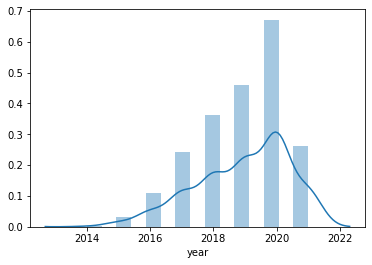

In [33]:
sns.distplot(movies['year'])

In [34]:
movies[(movies['Language']=='English')&(movies['Score']>5)]

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
417,Cops and Robbers,Animation / Short,2020-12-28,7,6.9,English,2020,12,Mon
325,Canvas,Animation / Short,2020-12-11,9,6.5,English,2020,12,Fri
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,2019-08-21,10,5.2,English,2019,8,Wed
498,Zion,Documentary,2018-08-10,11,7.2,English,2018,8,Fri
560,If Anything Happens I Love You,Animation / Short,2020-11-20,12,7.8,English,2020,11,Fri
496,The Road to El Camino: A Breaking Bad Movie,Making-of,2019-10-29,13,7.2,English,2019,10,Tue
434,I'm No Longer Here: A Discussion with Guillerm...,Aftershow / Interview,2020-11-03,14,7.0,English,2020,11,Tue
552,Anima,Musical / Short,2019-06-27,15,7.7,English,2019,6,Thu
513,Sitara: Let Girls Dream,Animation / Short,2020-03-08,15,7.3,English,2020,3,Sun
301,John Was Trying to Contact Aliens,Documentary,2020-08-20,16,6.4,English,2020,8,Thu


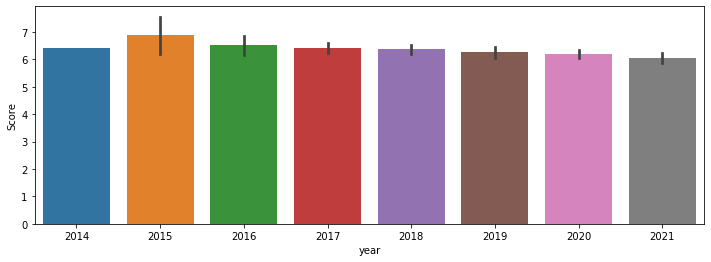

In [35]:
plt.figure(figsize=(12,4))
sns.barplot(x='year',y='Score',data=movies)

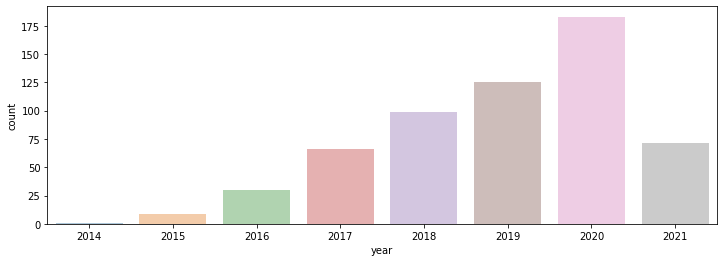

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='year',data=movies,alpha=0.4)

In [37]:
t=movies[(movies['Score']>8)&(movies['Runtime']>85)]
t.head()

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
568,Chasing Coral,Documentary,2017-07-14,89,8.1,English,2017,7,Fri
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12,Tue
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English,2021,3,Wed
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,Fri
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,2019,11,Fri


In [38]:
t['Genre'].nunique()

4

In [39]:
t.count()

Title       12
Genre       12
Premiere    12
Runtime     12
Score       12
Language    12
year        12
month       12
weekday     12
dtype: int64

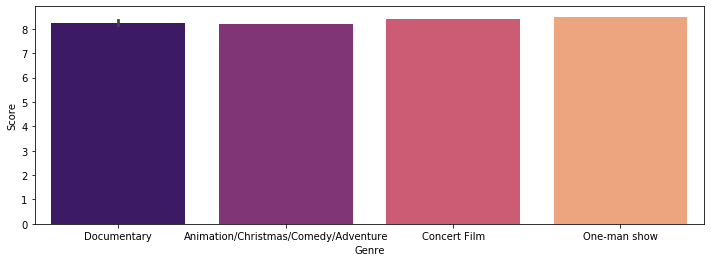

In [40]:
plt.figure(figsize=(12,4))
sns.barplot(x='Genre',y='Score',data=t,palette='magma')

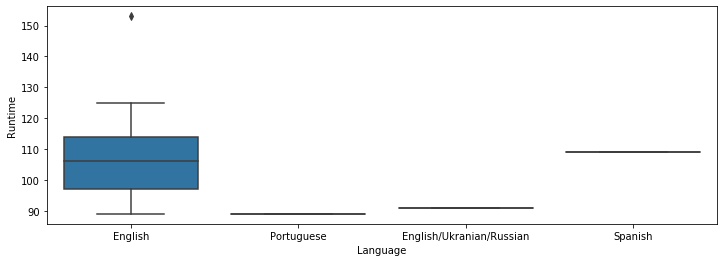

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Language',y='Runtime',data=t)

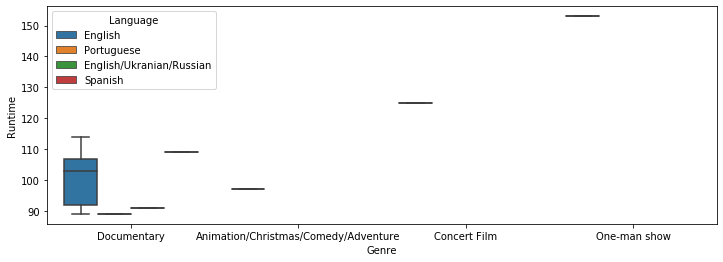

In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(data=t,x='Genre',y='Runtime',hue='Language')

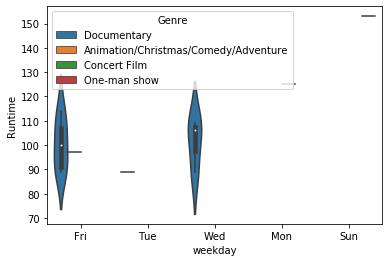

In [43]:
sns.violinplot(x='weekday',y='Runtime',data=t,hue='Genre')

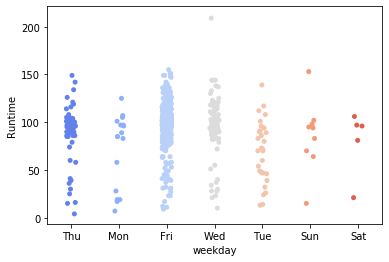

In [44]:
sns.stripplot(x='weekday',y='Runtime',data=movies,jitter=True,palette='coolwarm')

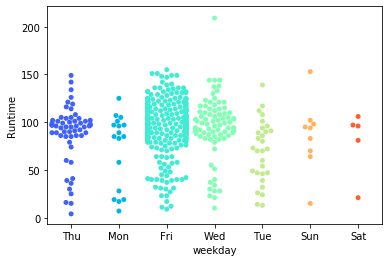

In [45]:
sns.swarmplot(x='weekday',y='Runtime',data=movies,palette='rainbow')

In [46]:
data1=movies[((movies['Genre']=='Drama')|(movies['Genre']=='Documentary'))&(movies['Score']>7)]
data1.head()

,Title,Genre,Premiere,Runtime,Score,Language,year,month,weekday
498,Zion,Documentary,2018-08-10,11,7.2,English,2018,8,Fri
501,Extremis,Documentary,2016-09-13,24,7.3,English,2016,9,Tue
524,Period. End of Sentence.,Documentary,2019-02-12,26,7.4,English/Hindi,2019,2,Tue
471,"Ram Dass, Going Home",Documentary,2018-04-06,31,7.1,English,2018,4,Fri
521,Fire in Paradise,Documentary,2019-11-01,39,7.4,English,2019,11,Fri


In [47]:
data1.count()

Title       92
Genre       92
Premiere    92
Runtime     92
Score       92
Language    92
year        92
month       92
weekday     92
dtype: int64

C:\Users\roshn\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



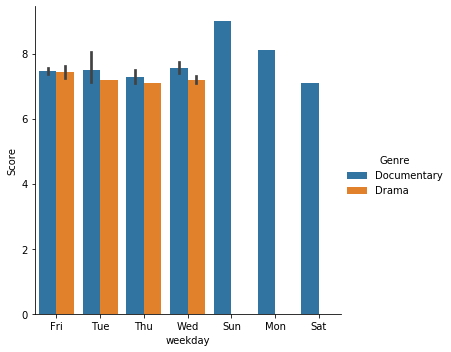

In [48]:
sns.factorplot(x='weekday',y='Score',hue='Genre',data=data1,kind='bar')

In [65]:
# sns.kdeplot(x='Runtime',y='Score',hue='Genre',data=data1,palette='Set2')

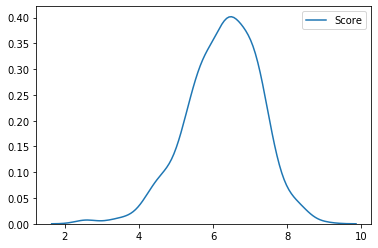

In [50]:
sns.kdeplot(movies['Score'])

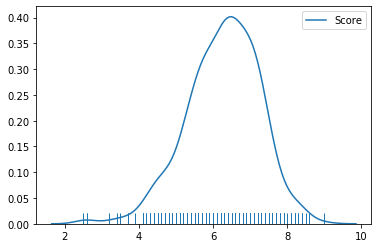

In [51]:
sns.kdeplot(movies['Score'])
sns.rugplot(movies['Score'])

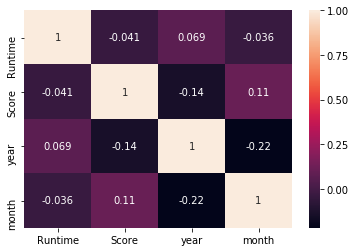

In [52]:
sns.heatmap(movies.corr(),annot=True)

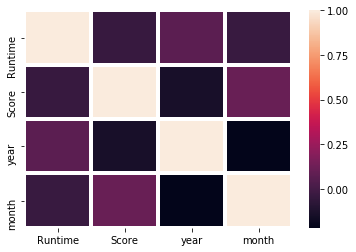

In [53]:
sns.heatmap(movies.corr(),linecolor='white',lw=3)

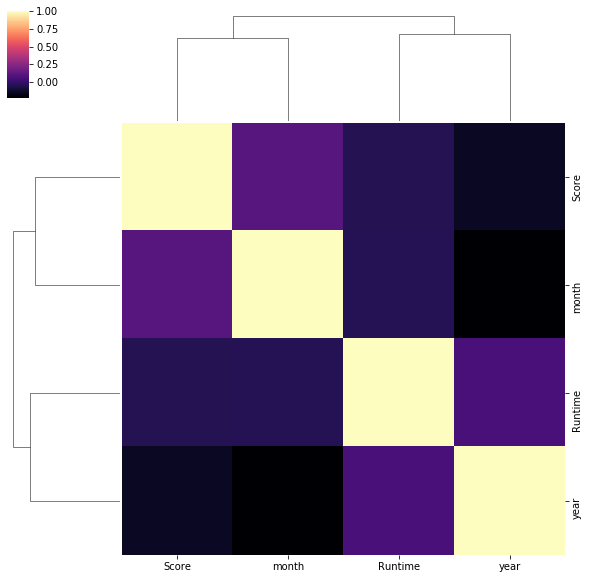

In [54]:
sns.clustermap(movies.corr(),cmap='magma')

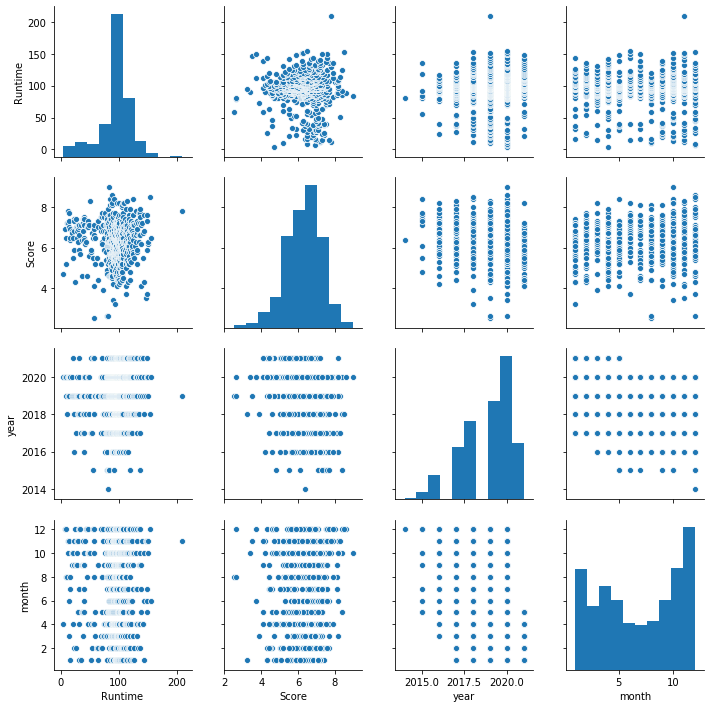

In [55]:
sns.pairplot(movies)

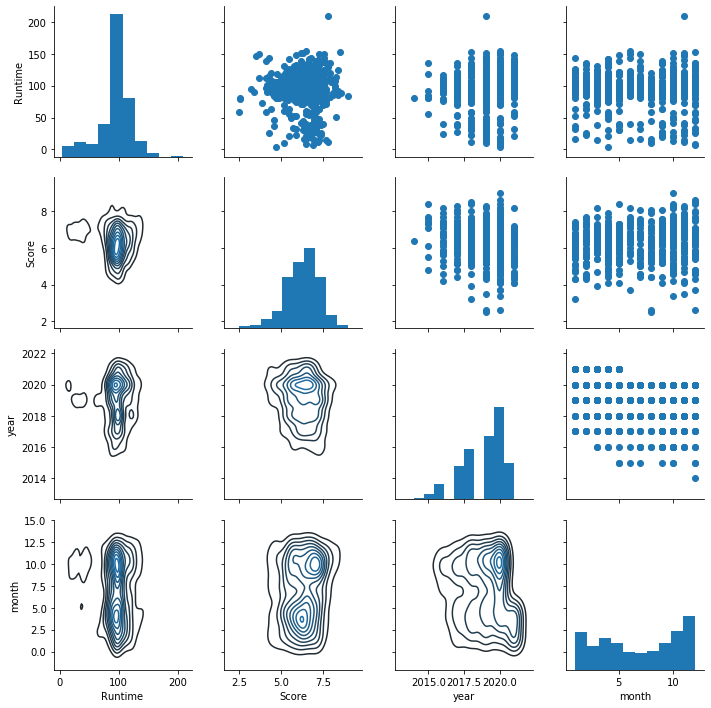

In [56]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(movies)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

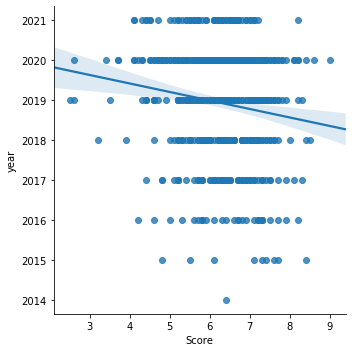

In [57]:
sns.lmplot(x='Score',y='year',data=movies)

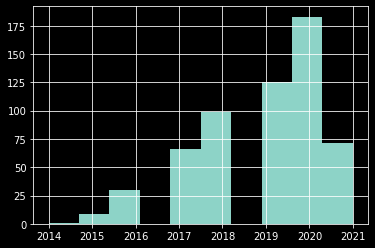

In [58]:
plt.style.use('dark_background')
movies['year'].hist()

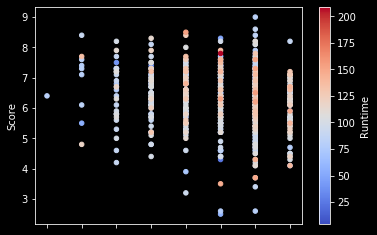

In [59]:
movies.plot.scatter(x='year',y='Score',c='Runtime',cmap='coolwarm')

In [60]:
data1.iplot(kind='scatter',x='year',y='Score',mode='markers',size=10)

In [61]:
data1.iplot(kind='bar',x='year',y='Score')

In [62]:
movies.count().iplot(kind='bar')